In [1]:
import sys
import data_loading
import data_understanding
import data_model
import model_training
import model_testing
import data_ingestion
import metrics

In [2]:
# To Reload modules after updating them
import importlib
importlib.reload(data_loading)
importlib.reload(data_understanding)
importlib.reload(data_model)
importlib.reload(model_training)
importlib.reload(model_testing)
importlib.reload(data_ingestion)
importlib.reload(metrics)

<module 'metrics' from 'c:\\Users\\admin\\Desktop\\ConvNILM-master\\ConvNILM-master\\metrics.py'>

In [3]:
dishwasher_power = data_loading.read_csv_data("data/dishwasher_train.csv")
fridge_power = data_loading.read_csv_data('data/fridge_train.csv')
main_power = data_loading.read_csv_data('data/main_train.csv')

Data Loading...Done.
Statistics of interest:
Overall min power: 73.48100000000002, Overall max power: 6048.699999999999
Overall mean power: 370.91555422946004, Overall std power: 549.1880538356259
Min dishwasher power: 0.0, Max dishwasher power: 2570.6
Mean dishwasher power: 25.87109798872012, Std dishwasher power: 238.58016099407692
Zero padding...Done.
Rescaling...Done.
Preparing data ingestion...Done.
Building model...

c:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Done.
Model training...


c:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 1231s 103ms/step - loss: 0.0092
Epoch 2/8
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 1109s 93ms/step - loss: 0.0051
Epoch 3/8
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 1105s 93ms/step - loss: 0.0050
Epoch 4/8
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 1105s 93ms/step - loss: 0.0050
Epoch 5/8
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 1101s 93ms/step - loss: 0.0049
Epoch 6/8
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 1101s 93ms/step - loss: 0.0049
Epoch 7/8
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 1098s 92ms/step - loss: 0.0049
Epoch 8/8
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 1089s 92ms/step - loss: 0.0049
Training completed.


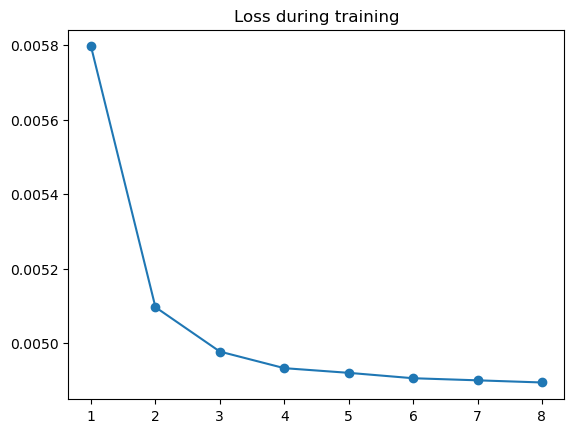

In [5]:
model = model_training.train_model(appliance_name='dishwasher',
                                   main_path='data/main_train.csv',
                                   appliance_path='data/dishwasher_train.csv',
                                   window_size=600,
                                   batch_size=512,
                                   build_model_func=data_model.build_dishwasher_cnn,
                                   epochs=8,
                                   rescaling='normalize')

In [6]:
model.save('dishwasher_model.keras')

In [8]:
ground_truth, predicted_values = model_testing.test_model(appliance_name='dishwasher',
                                                          main_path='data/main_train.csv',
                                                          appliance_path='data/dishwasher_train.csv',
                                                          model_path='dishwasher_model.keras',
                                                          window_size=600,
                                                          batch_size=512,
                                                          rescaling='normalize',
                                                          appliance_min_power=0.0,
                                                          appliance_max_power=2570.6,
                                                          main_min_power=73.48100000000002,
                                                          main_max_power=6048.699999999999)

Data Loading...Done.
Zero padding...Done.
Rescaling...Done.
Preparing data ingestion...Done.
    4/11880 ━━━━━━━━━━━━━━━━━━━━ 3:57 20ms/step 

c:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11880/11880 ━━━━━━━━━━━━━━━━━━━━ 189s 16ms/step
Done.


In [9]:
f1 = metrics.compute_F1_score(predicted_values, ground_truth)
print('Energy based F1 score on test set: {}'.format(f1))

Energy based F1 score on test set: [0.98735714]
